# BREAKING MESSAGE CODE

In [ ]:
#########################################################################################################
#   Authors and main roles:                                                                             #
#       - Mikel Martinez Garrido (s4752295): Code author, theory, documentation, report writing         #
#       - Cala González Penagos (S4616162): Testing, theory, experimental data analysis, report writing #
#   Course: Physics Laboratory III, University of Groningen                                             #
#   Date: June 2023                                                                                     #
#########################################################################################################

# DESCRIPTION: Python for RSA asymmetric cryptographic algorithm BREAKING.
# For demonstration, values are relatively small compared to practical applicationimport time
import matplotlib.pyplot as plt
import statistics as stat
import pylab
import numpy as np
def compute_lcm(x, y):

   # choose the greater number
   if x > y:
       greater = x
   else:
       greater = y

   while(True):
       if((greater % x == 0) and (greater % y == 0)):
           lcm = greater
           break
       greater += 1

   return lcm

def gcd(a, h):
    temp = 0
    while(1):
        temp = a % h
        if (temp == 0):
            return h
        a = h
        h = temp
  

def factors_of_a_number(x):
    factors = []
    for i in range(1, x + 1):
        if x % i == 0:
            factors.append(i)
    factors.remove(1)
    factors.remove(x)
    return factors

def compute_d(e, phi):
    g, x, y = egcd_for_computing_d(e, phi)
    if g != 1:
        raise Exception('modular inverse does not exist')
    else:
        return x % phi

def egcd_for_computing_d(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd_for_computing_d(b % a, a)
        return (g, x - (b // a) * y, y)

def encrypting(message, e, n):
    message_encrypted = []
    for m in message:
        message_encrypted.append(m**e % n)
    return message_encrypted

def decrypting(message_encrypted, d, n):
    message_decrypted = []
    for dec in message_encrypted:
        message_decrypted.append(dec**d % n)
    return message_decrypted

def breaking(message, e_all, p_all, q_all, loops):
    for e in e_all:
        times_list = []
        times_averages = []
        times_errors = []
        for counts in range(loops):
            n_values = []
            cracking_times = []
            for i in range(len(p_all)):
                p = p_all[i]
                q = q_all[i]
                n=p*q
                n_values.append(n)

                phi = compute_lcm(p-1,q-1)

                while (e < phi):
    
                    # e must be co-prime to phi and
                    # smaller than phi.
                    if(gcd(e, phi) == 1):
                        break
                    else:
                        e = e+1

                #message to break
                encrypted_message_to_break = encrypting(message, e, n)
                
                #CRACK
                #getting the factors of n
                start_crack = time.time()
                factors = factors_of_a_number(n)
                if len(factors) == 2:
                    pass
                else:
                    factors = factors_of_a_number(n)
                
                #computing trial variables
                p_trial, q_trial = factors_of_a_number(n)
                phi_trial = compute_lcm(p_trial-1,q_trial-1)

                trial_d = compute_d(e, phi_trial)
                    
                #possible crack
                possible_final_message = decrypting(encrypted_message_to_break, trial_d, n)
                
                #veryfing the message
                crack = 0
                while crack == 0:
                    for i in range(len(message)):
                        if message[i] == possible_final_message[i]:
                            if i==len(message)-1:
                                crack = 1
                                cracked_message = possible_final_message
                                end_crack = time.time()
                                crack_needed_time = end_crack - start_crack
                                cracking_times.append(crack_needed_time)
                            else:
                                continue
                        else:
                            print("no")
            
            times_list.append(cracking_times)
        
        #Computing means and stdes
        for i in range(len(p_all)):
            values = []
            for j in range(loops):
                x = times_list[j][i]
                values.append(x)
            means = stat.mean(values)
            devs = stat.stdev(values)
            times_averages.append(means)
            times_errors.append(devs)

        #plt.errorbar(n_values, times_averages, yerr=times_errors, fmt='o')
        #print(times_errors)
        #plt.title(f"For e being: {e}, cracking")
        #plt.xlabel("key length n = p*q")
        #plt.ylabel("time in s")
        #plt.show()

        # create nth degree polynomial fit
        n = 2
        zn = np.polyfit(n_values, times_averages,n) 
        pn = np.poly1d(zn) # construct polynomial 

        # create qth degree polynomial fit
        q = 3
        zq = np.polyfit(n_values, times_averages,q) 
        pq = np.poly1d(zq)

        # plot data and fit
        xx = np.linspace(0, max(n_values), 500)
        pylab.plot(xx, pn(xx),'-g', xx, pq(xx),'-b')
        pylab.errorbar(n_values, times_averages, yerr=times_errors, fmt='r.')

        # customise graph
        pylab.title(f"For e being: {e}, cracking")
        pylab.legend(['degree '+str(n),'degree '+str(q),'data'])
        pylab.xlabel("key length n = p*q")
        pylab.ylabel("time in s")

        pylab.show()
                        


# Cracking times for e=3,17,65537, different degree polyfits 

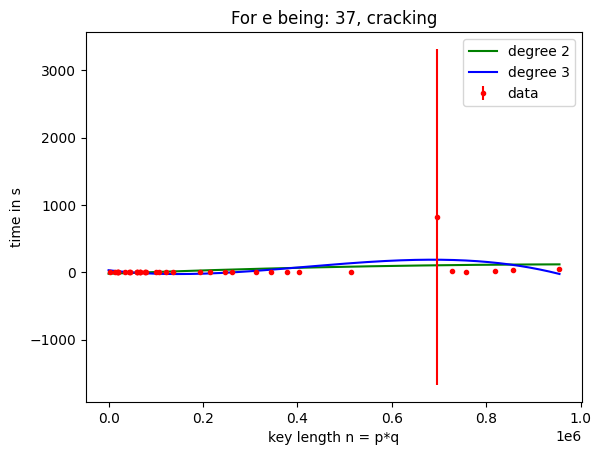

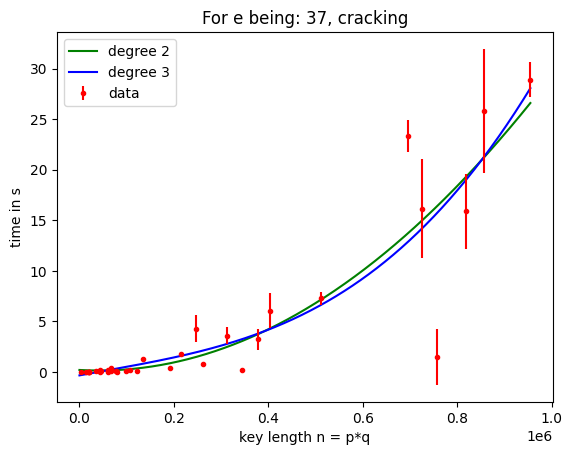

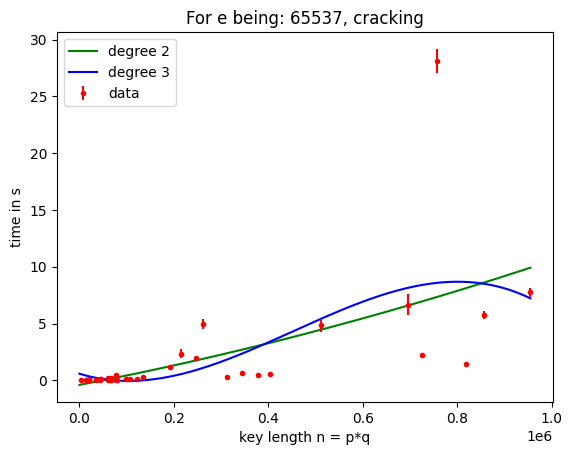

In [3]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 10
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2683,3637,3803,3967,4289,4483,4999]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

breaking(message, e_numbers, p_numbers, q_numbres, loops)

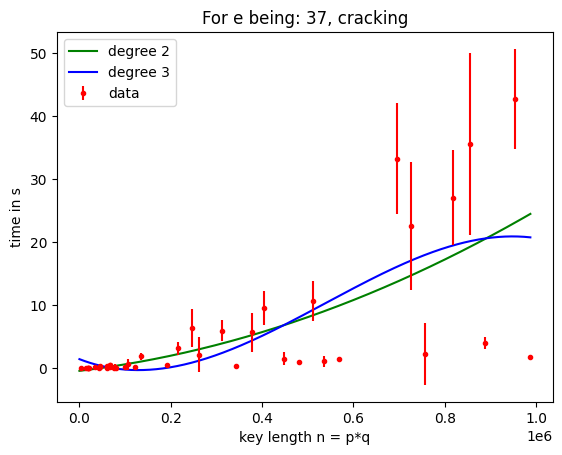

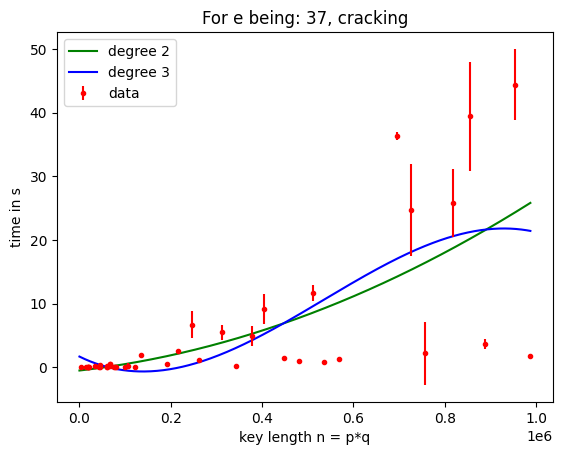

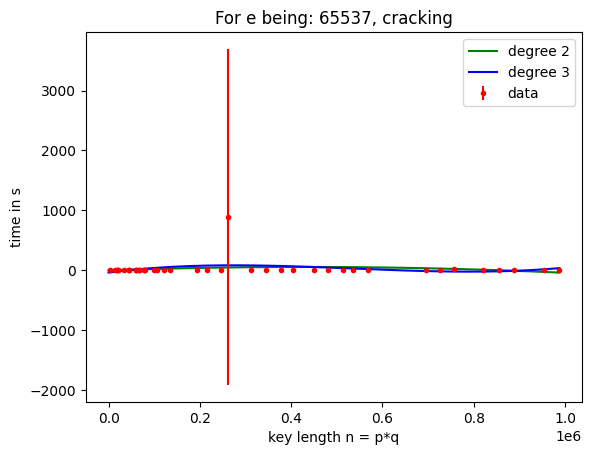

In [ ]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 10
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2351,2521,2683,2803,2971,3637,3803,3967,4289,4483,4651,4999,5171]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

breaking(message, e_numbers, p_numbers, q_numbres, loops)

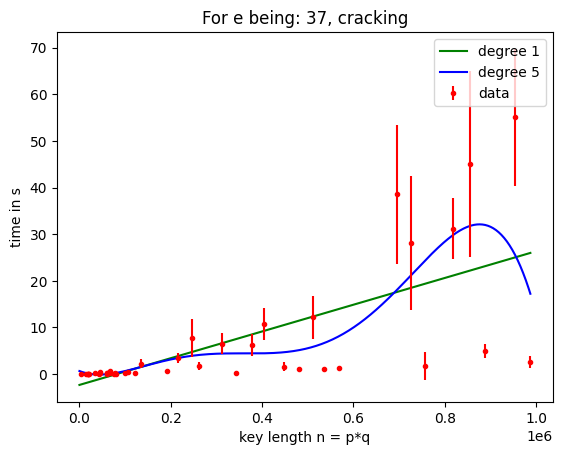

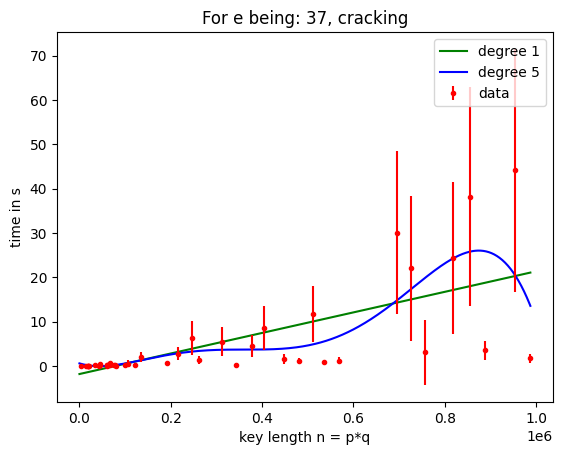

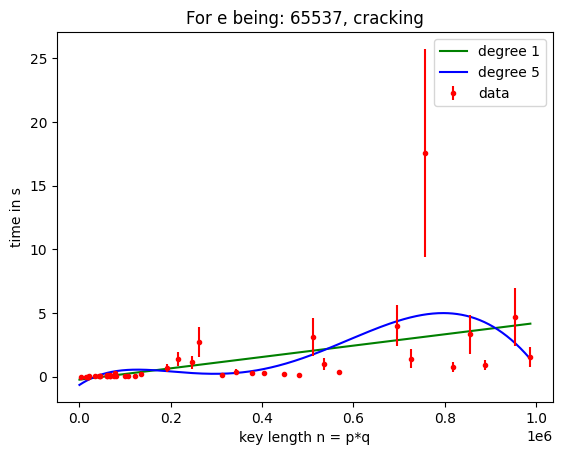

In [32]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 10
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2351,2521,2683,2803,2971,3637,3803,3967,4289,4483,4651,4999,5171]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

breaking(message, e_numbers, p_numbers, q_numbres, loops)

[0.0007722150809516702, 0.0023359666707477122, 0.014692309394476152, 0.003520380921730576, 0.005066672367458852, 0.0034293403081405343, 0.011147504403625446, 0.003016834524273507, 0.046815040491669874, 0.03701281288494127, 0.00470947679139981, 0.0402261569226324, 0.04511592146669977, 0.04517889892194014, 0.06986292449203862, 0.04526018248617878, 0.010777260125098534, 0.13590283730261316, 0.016023809540115563, 0.009908079337551627, 0.32726049340294855, 0.015944824577927993, 0.2638624187602552, 0.04137171128255595, 0.4840448545723275, 0.8839534060294493, 1.0232692155279577, 0.8156752615590368, 0.20577700271231508, 1.6443397969194373, 1.3886076045446203, 0.1397008013950191, 0.3006919165899573, 1.8057936650397786, 0.36489884520491583, 0.2662479148406572, 3.5237422780184944, 2.960410895285351, 2.58299911672755, 4.701632681722538, 4.034830262086837, 0.7985998855407903, 5.012567249290281, 0.12415227161562963]


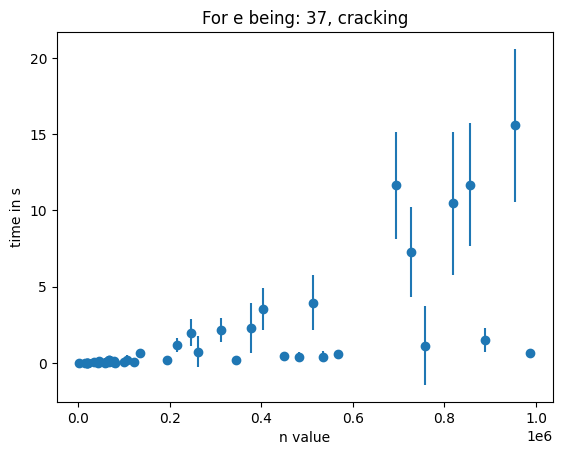

[0.0007118495066724815, 0.0010610505876064444, 0.0026036243228850795, 0.0026061150475177168, 0.0032468436013947098, 0.0018964307340008635, 0.013141014898081437, 0.004477624982664482, 0.03270413812942277, 0.03099124778289766, 0.004362018772268025, 0.00765837324186129, 0.008761175799086125, 0.007092904067740765, 0.05391522536470642, 0.01358329862781731, 0.007444412248479978, 0.017053385178461042, 0.0030157431579819266, 0.013671666838141704, 0.12500355014266334, 0.006286661100758989, 0.0426017509820048, 0.03659052880487831, 0.05506390206821958, 0.5811293177468143, 0.07852697246167638, 0.332497176554458, 0.03291757293537824, 0.42005572585941336, 0.6419434945415057, 0.10957561221569077, 0.1445192534460092, 0.39771064197600725, 0.03734088807300091, 0.034875520261873884, 0.4112903434686525, 2.1399969824446425, 1.3679823268611329, 1.5592846427195655, 2.577473919551969, 0.25446999094834577, 2.581570792232248, 0.08441837776231438]


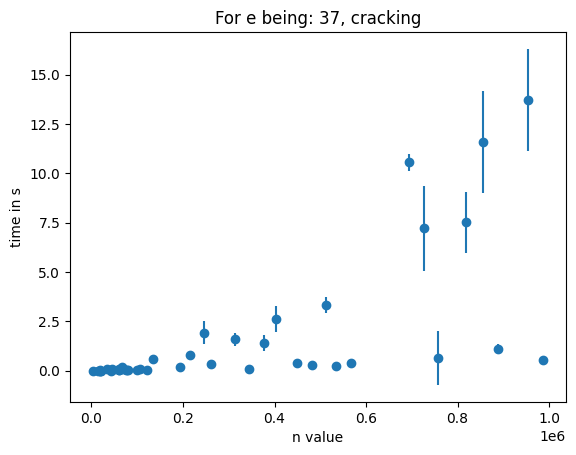

[0.0025149271871910224, 0.0068566589337443464, 0.006984408379656193, 0.005463057118952049, 0.005751030316999457, 0.03561211191705425, 0.017654891327285663, 0.013961851401280815, 0.08436700622054151, 0.05605770373748127, 0.0265405716621137, 0.1206033765232531, 0.06896538118609158, 0.030871941429718823, 0.032504933808011074, 0.11549729264886967, 0.02867656923789025, 0.24806683421967776, 0.015426644655389253, 0.04850178847841264, 0.03785870833316748, 0.05281795293966554, 0.1673894512977457, 0.6270936128505298, 1.2101054107935387, 0.9753202626640302, 2.4838962212267712, 0.12337815893724272, 0.35726504888734045, 0.1959728323712037, 0.2419328989855995, 0.14760703524222185, 0.10828207836482066, 2.4791406408752454, 0.7562021426540213, 0.42283694432995605, 3.9354376664727044, 1.1425283412460414, 17.060248391324407, 0.7715662271644174, 3.460946524350438, 0.8276227419812876, 4.573256189673374, 1.4137328714524526]


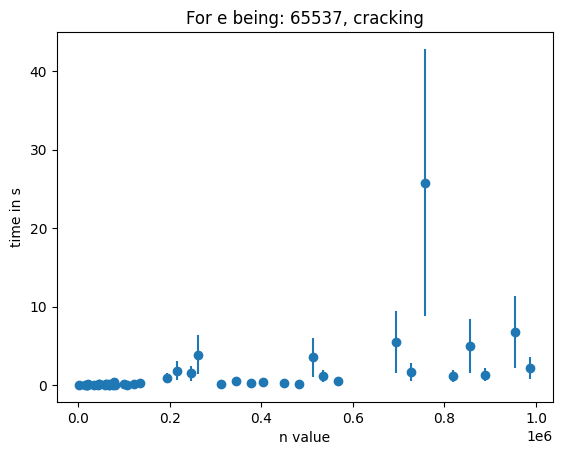

In [12]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 10
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2351,2521,2683,2803,2971,3637,3803,3967,4289,4483,4651,4999,5171]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

breaking(message, e_numbers, p_numbers, q_numbres, loops)

[0.001243419211661782, 0.004155615312319898, 0.028655151960435787, 0.0058747305341355725, 0.017302689424077356, 0.005269627946692388, 0.04882370869030265, 0.006721781641387865, 0.09063981246584257, 0.06446873719935561, 0.009178036441113485, 0.11355192212295746, 0.10328916644594055, 0.045812842209543986, 0.16885660012524792, 0.03408218442781879, 0.010082761641169464, 0.20260342588566152, 0.010694523742893832, 0.03269445623476272, 0.4403188804515655, 0.014056414872072908, 0.4301514420939193, 0.13939385097414111, 0.5853484527993551, 2.108933542391521, 1.3507050919964094, 0.9086449597990652, 0.1623238550669364, 1.9794558136149676, 1.7692407360169933, 0.41477163872703793, 0.2774329779699607, 2.409166601018649, 0.5077127842991993, 0.13677556686115971, 6.381422374344583, 7.521767909604302, 3.5763520812499032, 5.174650420266385, 10.770705601865833, 0.716340501484482, 5.672514392854152, 0.26324607993070354]


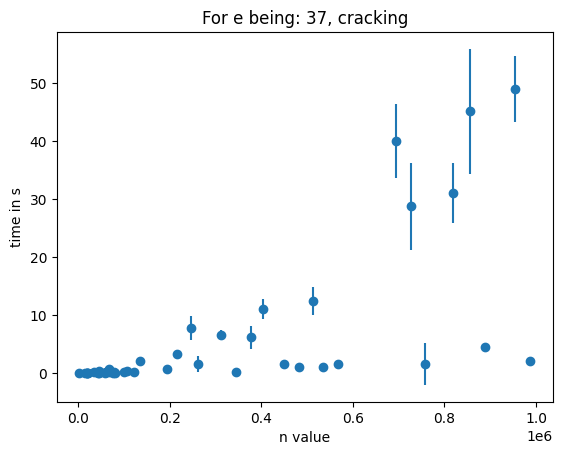

[0.004339315561080375, 0.006924097702350467, 0.007967033528407627, 0.007567613112840804, 0.015235526846507272, 0.0096456934689081, 0.043845842447994825, 0.00972317976056356, 0.0843593939782137, 0.06977592755438479, 0.0156945064806171, 0.027430162005934938, 0.02608782733865887, 0.07795950990404497, 0.15594580281275425, 0.042427327512933995, 0.025961304472023012, 0.04105689008112309, 0.027580154124241894, 0.05681212167345497, 0.32582850133996427, 0.04316519320198796, 0.288452488757332, 0.09246278915970972, 0.6694437196541445, 1.8709318836667563, 0.31722165758448695, 1.2960815122219875, 0.20368010784422108, 1.5253332312592955, 2.8685417982229535, 0.3942223848906062, 0.34342485214831364, 1.637849921148849, 0.2004785073596279, 0.1617392457640231, 4.290348643462135, 6.036537284460852, 3.5148579312298764, 3.9966855470965066, 6.380251997433344, 0.7472838670288786, 5.985599184577878, 0.4157604604036198]


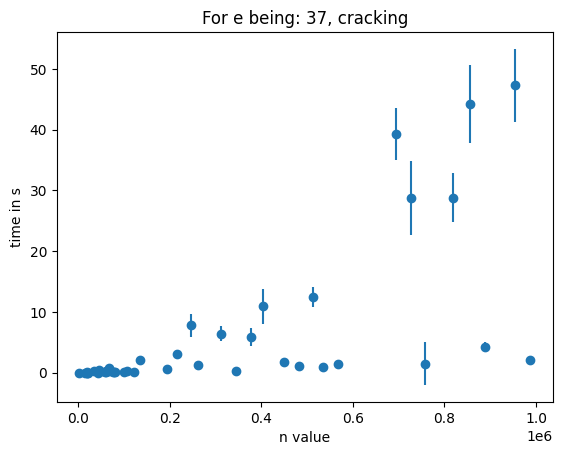

[0.007333515588515453, 0.007628219391514898, 0.010377882177757808, 0.009178426560060392, 0.008331192925124459, 0.009701445561767368, 0.011434388100180366, 0.012386086953305947, 0.018866937119177262, 0.021066899141805845, 0.01487242287951208, 0.024869089320673346, 0.024890689009130437, 0.01760098409178683, 0.017453151196729817, 0.03509975338586031, 0.01921779273999367, 0.025282681643314167, 0.021698617768219772, 0.02034063122496888, 0.027847906408064175, 0.02388563037726902, 0.054025799451319315, 0.08017046994949972, 0.18342021339618994, 0.07850316203318017, 0.1684820254997252, 0.060390553945408314, 0.05462069634741859, 0.04265361196605803, 0.0779558633298961, 0.05108116905874948, 0.06087428009045906, 0.22528965573065943, 0.11737677034593418, 0.05502865990342879, 0.2998166970011481, 0.12014573642250305, 0.7112173861671102, 0.1410079249996545, 0.14239446527068778, 0.15000497975493146, 0.7477151811780508, 0.16134970667275578]


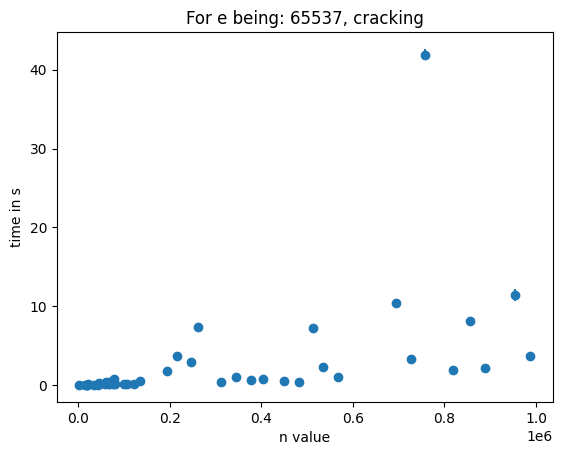

In [13]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)
loops = 25
e_numbers = [3,17,65537]

p_numbers = [13,71,97,101,103,107,179,229,233,239,311,313,317,347,349,353,401,409,419,521,557,641,709,1009,1129,1289,1367,1637,1801,1979,2113,2351,2521,2683,2803,2971,3637,3803,3967,4289,4483,4651,4999,5171]

q_numbres = [191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191]

breaking(message, e_numbers, p_numbers, q_numbres, loops)

[2.045767610670399, 116.21678780652522]


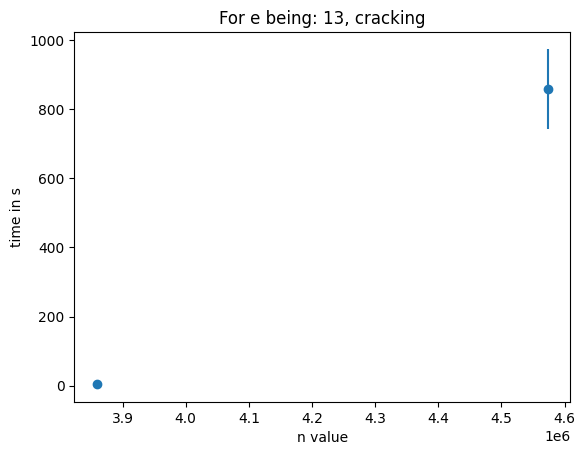

[0.6627919213767, 6.422150977652829]


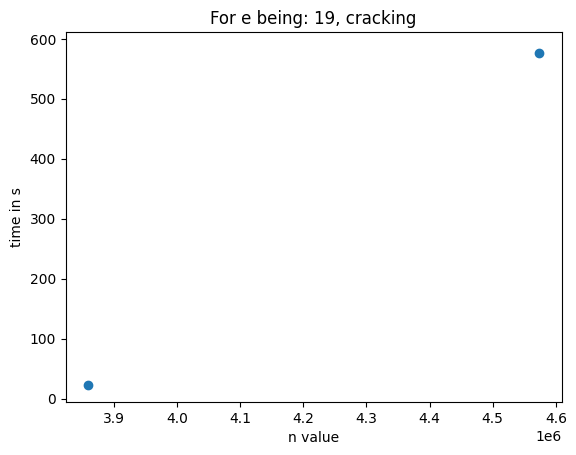

[0.43594751603380993, 0.27697008389028577]


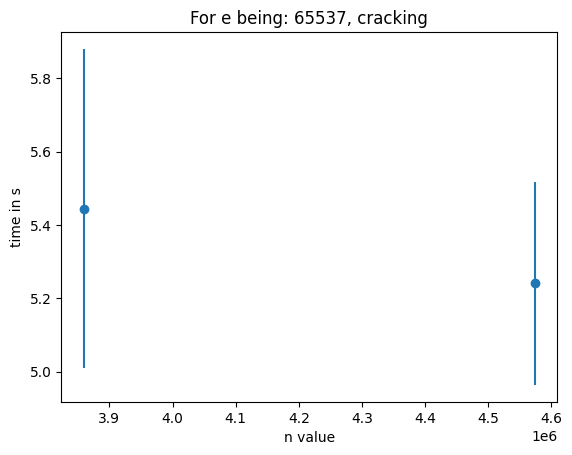

In [3]:
message =(84,117,32,101,114,101,32,117,110,32,115,97,112,111)

e_numbers = [3,17,65537]

p_numbers = [1801,1979]
q_numbres = [2143,2311]

breaking(message, e_numbers, p_numbers, q_numbres)